## 1. Preparação dos Dados

In [62]:
## BIBLIOTECAS UTILIZADAS
import pandas as pd
import numpy as np
import sqlite3
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# CARREGANDO OS DADOS
clientes = pd.read_csv('dados\olist_customers_dataset.csv')
geolocalizacao = pd.read_csv('dados\olist_geolocation_dataset.csv')
itens_pedidos = pd.read_csv('dados\olist_order_items_dataset.csv')
pedidos_pagamentos = pd.read_csv('dados\olist_order_payments_dataset.csv')
comentarios_pedidos = pd.read_csv('dados\olist_order_reviews_dataset.csv')
pedidos = pd.read_csv('dados\olist_orders_dataset.csv')
produtos = pd.read_csv('dados\olist_products_dataset.csv')
vendedores = pd.read_csv('dados\olist_sellers_dataset.csv')
traducao_de_produto = pd.read_csv('dados\product_category_name_translation.csv')

### 1.1 Carregando dados de Clientes

In [ ]:
# Convertendo os nomes das cidades para maiúsculo
clientes['customer_city'] = clientes['customer_city'].str.title()

#exibindo apenas as 5 primeiras linhas
clientes.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP


In [4]:
# Verificando existência de valores ausentes
clientes.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [5]:
# Verificando linhas completamente duplicadas
duplicados_completos = clientes.duplicated().sum()
print(f"Linhas completamente duplicadas: {duplicados_completos}")

Linhas completamente duplicadas: 0


### 1.2 Carregando dados de Geolocalização

In [6]:
# Convertendo os nomes das cidades para maiúsculo
geolocalizacao['geolocation_city'] = geolocalizacao['geolocation_city'].str.title()

# exibindo apenas as 5 primeiras linhas
geolocalizacao.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Sao Paulo,SP
1,1046,-23.546081,-46.644820,Sao Paulo,SP
2,1046,-23.546129,-46.642951,Sao Paulo,SP
3,1041,-23.544392,-46.639499,Sao Paulo,SP
4,1035,-23.541578,-46.641607,Sao Paulo,SP


In [7]:
# Verificando existência de valores ausentes
geolocalizacao.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

### 1.3 Carregando dados de Itens Pedidos

In [8]:
# exibindo apenas as 5 primeiras linhas do dataset
itens_pedidos.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
# Imprimindo informações sobre o dataset
itens_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [10]:
# Verificando existência de valores ausentes
itens_pedidos.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [11]:
# Verificando linhas completamente duplicadas
duplicados_completos = itens_pedidos.duplicated().sum()
print(f"Linhas completamente duplicadas: {duplicados_completos}")

Linhas completamente duplicadas: 0


### 1.4 Carregando dados de Pagamentos

In [12]:
# imprimindo apenas as 5 primeiras linhas
pedidos_pagamentos.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [13]:
# Verificando existência de valores ausentes
pedidos_pagamentos.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [14]:
# Verificando linhas completamente duplicadas
duplicados_completos = pedidos_pagamentos.duplicated().sum()
print(f"Linhas completamente duplicadas: {duplicados_completos}")

Linhas completamente duplicadas: 0


### 1.5 Carregando dados de Comentários/Avaliações

In [15]:
# Limpando e tratando os dados
# 1. Convertendo datas
comentarios_pedidos['review_creation_date'] = pd.to_datetime(comentarios_pedidos['review_creation_date'])
comentarios_pedidos['review_answer_timestamp'] = pd.to_datetime(comentarios_pedidos['review_answer_timestamp'])

# Imprimindo as 5 primeiras linhas
comentarios_pedidos.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [16]:
# Imprimindo informações do dataset
comentarios_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [17]:
# Verificando existência de valores ausentes
comentarios_pedidos.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

### 1.6 Carregando dados de Pedidos

In [18]:
# Limpando e tratando os dados
# 1. Convertendo datas
pedidos['order_purchase_timestamp'] = pd.to_datetime(pedidos['order_purchase_timestamp'])
pedidos['order_delivered_customer_date'] = pd.to_datetime(pedidos['order_delivered_customer_date'])
pedidos['order_estimated_delivery_date'] = pd.to_datetime(pedidos['order_estimated_delivery_date'])

In [19]:
# Verificando as 5 primeiras linhas
pedidos.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [20]:
# Verificando as existência de valores nulos
pedidos.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### 1.6.1 Limpando dados de Pedidos

In [ ]:
# Verificar composição dos nulos - order_approved_at
print("Composição original dos nulos:")
print(pedidos[pedidos['order_approved_at'].isnull()]['order_status'].value_counts())

Composição original dos nulos:
order_status
canceled     141
delivered     14
created        5
Name: count, dtype: int64


1. Para status "canceled" (141 registros):

- São esperados: pedidos cancelados não precisam ter data de aprovação;

2. Para status "delivered" (14 registros):

- Pedidos entregues deveriam ter sido aprovados, realizar correção.

In [45]:
# Usando a data de compra como aproximação
pedidos.loc[(pedidos['order_approved_at'].isnull()) & 
           (pedidos['order_status'] == 'delivered'),
           'order_approved_at'] = pedidos['order_purchase_timestamp']

3. Para status "created" (5 registros):
- Pedidos que nunca saíram do status inicial

In [ ]:
# Verificar composição dos nulos - order_delivered_carrier_date
print("Composição original dos nulos:")
print(pedidos[pedidos['order_delivered_carrier_date'].isnull()]['order_status'].value_counts())

Composição original dos nulos:
order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: count, dtype: int64


- **unavailable**  ->  609  ->  Indica que o produto não estava disponível para envio.
- **canceled** -> 550 -> Pedidos cancelados nunca são enviados.
- **invoiced** -> 314 -> Fatura gerada, mas ainda não enviado ao transportador.
- **processing** -> 301 -> Pedido em processamento (não enviado ainda).
- **created** -> 5 -> Pedido recém-criado (não aprovado nem enviado).

##### Analisando pedidos 'Approved' - order_delivered_carrier_date

In [23]:
# Filtrando pedidos aprovados com nulos
nulos_aprovados = pedidos[
    (pedidos['order_status'] == 'approved') & 
    (pedidos['order_delivered_carrier_date'].isnull())
]

print("Pedidos aprovados sem data de envio:")
print(nulos_aprovados[['order_id', 'order_purchase_timestamp']])

Pedidos aprovados sem data de envio:
                               order_id order_purchase_timestamp
44897  a2e4c44360b4a57bdff22f3a4630c173      2017-02-06 20:18:17
88457  132f1e724165a07f6362532bfb97486e      2017-04-25 01:25:34


In [24]:
# Verificando se houve pagamento nesse pedido aprovado
print(pedidos_pagamentos[pedidos_pagamentos['order_id'] == 'a2e4c44360b4a57bdff22f3a4630c173'])

                               order_id  payment_sequential payment_type  \
20877  a2e4c44360b4a57bdff22f3a4630c173                   1  credit_card   

       payment_installments  payment_value  
20877                     1          61.62  


- O pedido foi realmente aprovado (status approved faz sentido).

- Pagamento único no cartão (sem parcelamento).

- Tratamento escolhido: marcar como 'cancelado' pois o pedido nunca foi despachado.

In [25]:
# Alterando pedido para cancelado
pedidos.loc[
    pedidos['order_id'] == 'a2e4c44360b4a57bdff22f3a4630c173',
    ['order_status', 'order_delivered_carrier_date']
] = ['canceled', pd.NaT]  # Status + limpeza da data

In [26]:
# Verificando se pedido aprovado foi pago
print(pedidos_pagamentos[pedidos_pagamentos['order_id'] == '132f1e724165a07f6362532bfb97486e'])

                             order_id  payment_sequential payment_type  \
746  132f1e724165a07f6362532bfb97486e                   1  credit_card   

     payment_installments  payment_value  
746                     5         179.46  


- Status approved mas sem order_delivered_carrier_date.

- Situação idêntica ao pedido anterior.

- Tratamento: marcar como cancelado pois não houve envio.

In [27]:
# Atualizando pedido aprovado para cancelado
pedidos.loc[
    pedidos['order_id'] == '132f1e724165a07f6362532bfb97486e',
    ['order_status', 'order_delivered_carrier_date']
] = ['canceled', pd.NaT]

##### Analisando pedidos 'Delivered' - order_delivered_carrier_date

In [28]:
# Identificando os pedidos entregues com data de carrier nula
entrega_inconsistente = pedidos[
    (pedidos['order_status'] == 'delivered') & 
    (pedidos['order_delivered_carrier_date'].isnull())
]

print("Pedidos entregues com order_delivered_carrier_date nulo:")
print(entrega_inconsistente[['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date']])

Pedidos entregues com order_delivered_carrier_date nulo:
                               order_id order_purchase_timestamp  \
73222  2aa91108853cecb43c84a5dc5b277475      2017-09-29 08:52:58   
92643  2d858f451373b04fb5c984a1cc2defaf      2017-05-25 23:22:43   

      order_delivered_customer_date  
73222           2017-11-20 19:44:47  
92643                           NaT  


In [29]:
# Veridicando se houve comentário feito para esse pedido
print(comentarios_pedidos[comentarios_pedidos['order_id'] == '2aa91108853cecb43c84a5dc5b277475'])

                              review_id                          order_id  \
74309  e945d1831a3d98008913fc31dcbb804d  2aa91108853cecb43c84a5dc5b277475   

       review_score review_comment_title review_comment_message  \
74309             5                  NaN                    NaN   

      review_creation_date review_answer_timestamp  
74309           2017-10-17     2017-10-17 10:56:02  


- Sistema falhou em registrar a data de envio ao transportador

- Mas todas as evidências indicam que o pedido foi completado normalmente

In [ ]:
# Convertendo todas as colunas de data
# Lista de colunas de data para converter
date_cols = ['order_purchase_timestamp', 'order_approved_at', 
             'order_delivered_carrier_date', 'order_delivered_customer_date']

# Converter para datetime com tratamento de erros
for col in date_cols:
    pedidos[col] = pd.to_datetime(pedidos[col], errors='coerce')

In [ ]:
# Cálculo do tempo médio
# Filtrar pedidos entregues com datas válidas
pedidos_entregues = pedidos[
    (pedidos['order_status'] == 'delivered') & 
    (pedidos['order_delivered_carrier_date'].notna()) & 
    (pedidos['order_approved_at'].notna())
]

# Calcular diferença em dias
if not pedidos_entregues.empty:
    tempo_medio = (pedidos_entregues['order_delivered_carrier_date'] - 
                  pedidos_entregues['order_approved_at']).dt.days.mean()
else:
    tempo_medio = 3  # Valor padrão se não houver dados

In [ ]:
# Preenchimento seguro da data estimada
# Verificar se o pedido existe
pedido_alvo = '2aa91108853cecb43c84a5dc5b277475'
if pedido_alvo in pedidos['order_id'].values:
    # Obter a data de aprovação (com verificação)
    data_aprovacao = pedidos.loc[pedidos['order_id'] == pedido_alvo, 'order_approved_at'].iloc[0]
    
    if pd.notna(data_aprovacao):
        pedidos.loc[pedidos['order_id'] == pedido_alvo, 'order_delivered_carrier_date'] = (
            data_aprovacao + pd.Timedelta(days=tempo_medio))
    else:
        print(f"Aviso: Pedido {pedido_alvo} não tem data de aprovação válida")
else:
    print(f"Aviso: Pedido {pedido_alvo} não encontrado")
        

In [ ]:
# Mostrando o pedido modificado
display(pedidos[pedidos['order_id'] == pedido_alvo][[
    'order_id', 'order_status', 'order_approved_at', 
    'order_delivered_carrier_date'
]])

# Verificando tipos das colunas
print("\nTipos das colunas após conversão:")
print(pedidos[date_cols].dtypes)

,order_id,order_status,order_approved_at,order_delivered_carrier_date
73222,2aa91108853cecb43c84a5dc5b277475,delivered,2017-09-29 09:07:16,2017-10-01 16:13:05.542825153



Tipos das colunas após conversão:
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
dtype: object


In [37]:
# Analisando se o pedido possui comentários do cliente
print(comentarios_pedidos[comentarios_pedidos['order_id'] == '2d858f451373b04fb5c984a1cc2defaf'])

                              review_id                          order_id  \
51996  4e755f114e50d33b9ac6a56e0d7d3ea9  2d858f451373b04fb5c984a1cc2defaf   

       review_score review_comment_title review_comment_message  \
51996             5                  NaN                    NaN   

      review_creation_date review_answer_timestamp  
51996           2017-06-25     2017-06-27 01:49:04  


 O pedido está marcado como delivered, mas:

- order_delivered_carrier_date = NaN (não foi registrado quando foi enviado ao transportador).

- order_delivered_customer_date = NaT (não há registro de entrega ao cliente).

Porém, o cliente deu nota 5 estrelas, o que sugere que recebeu o pedido sem problemas.

In [38]:
# Calcular a média de dias entre 'order_approved_at' e 'order_delivered_carrier_date'
media_dias = pedidos[
    (pedidos['order_status'] == 'delivered') & 
    (~pedidos['order_delivered_carrier_date'].isnull())
].apply(
    lambda x: (x['order_delivered_carrier_date'] - x['order_approved_at']).days,
    axis=1
).mean()

# Preencher a data estimada para o pedido problemático
pedidos.loc[
    pedidos['order_id'] == '2d858f451373b04fb5c984a1cc2defaf',
    'order_delivered_carrier_date'
] = pedidos['order_approved_at'] + pd.Timedelta(days=media_dias)

In [46]:
# Verificar composição dos nulos - order_delivered_customer_date
print("Composição original dos nulos:")
print(pedidos[pedidos['order_delivered_customer_date'].isnull()]['order_status'].value_counts())

Composição original dos nulos:
order_status
shipped        1107
canceled        621
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
Name: count, dtype: int64


##### Status "shipped" - order_delivered_customer_date

In [51]:
# Pedidos marcados com enviados mas sem data de entrega
# Verificar se há data de transporte como fallback
pedidos.loc[(pedidos['order_status'] == 'shipped') & 
           (pedidos['order_delivered_customer_date'].isnull()),
           'order_delivered_customer_date'] = pedidos['order_delivered_carrier_date'] + pd.Timedelta(days=5)  # estimativa média

##### Status 'delivered' - order_delivered_customer_date

In [49]:
# Usando data estimada
pedidos.loc[(pedidos['order_status'] == 'delivered') & 
           (pedidos['order_delivered_customer_date'].isnull()),
           'order_delivered_customer_date'] = pedidos['order_estimated_delivery_date']

In [ ]:
# Após correções
pedidos.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1781
order_delivered_customer_date    1850
order_estimated_delivery_date       0
dtype: int64

### 1.7 Carregando dados de Produtos

In [39]:
# analisando as 5 primeiras linhas
produtos.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [40]:
# Verificando existência de valores ausentes
produtos.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

### 1.7.1 Limpando dados de Produtos

Correção - product_category_name

In [ ]:
# Preenchendo categoria nome com 'nao_informado'
produtos['product_category_name'] = produtos['product_category_name'].fillna('nao_informado')

Correção - product_weight_g, product_length_cm, product_height_cm, product_width_cm 

In [56]:
# Preencher com médias da categoria
for col in ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    produtos[col] = produtos.groupby('product_category_name')[col].transform(
        lambda x: x.fillna(x.median()))  # Usar mediana por ser menos sensível a outliers

Correção - product_name_lenght, product_description_lenght, product_photos_qty

In [61]:
# Versão alternativa que preenche primeiro com a média global quando a média do grupo é NaN
for col in ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']:
    # Calcular médias por categoria
    group_means = produtos.groupby('product_category_name')[col].transform('mean')
    
    # Calcular média global
    global_mean = produtos[col].mean()
    
    # Preencher: primeiro tenta com a média do grupo, depois com a global
    produtos[col] = produtos[col].fillna(group_means).fillna(global_mean)

In [60]:
# Verificando resultado após correções
produtos.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

### 1.8 Carregando dados de Vendedores

In [41]:
# Convertendo a primeira letra das cidade para maiúcula
vendedores['seller_city'] = vendedores['seller_city'].str.title()

# Verificando apenas as 5 primeiras linhas
vendedores.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP


In [ ]:
# Verificnando exitência de valores nulos
vendedores.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

### 📝 Histórico de Tratamento - Olist
1. **Pedidos**: 
   - Nulos em `order_approved_at` → preenchidos com data de compra como aproximação
   - Nulos em `order_delivered_carrier_date` → marcados como cancelados pois os pedidos nunca foram despachados
   - Nulos em `order_delivered_customer_date` → preenchidos com datas estimadas
2. **Produtos**:
   - Categorias nulas → marcadas como "nao_informado"
   - Tratando categorias descritivas nulas → preenchidas com média do grupo ou média global
   - Tratando medidas físicas nulas → preenchidas com médias da categoria

## 2. Análise Exploratória de Dados

a) Qual o volume de pedidos por mês? Existe sazonalidade nas vendas?

In [ ]:
# Criando banco
conn = sqlite3.connect('olist.db')

In [64]:
# Carregando os dados do CSV para o banco (uma única vez)
pedidos.to_sql('pedidos', conn, if_exists='replace', index=False)

99441

In [66]:
# Executando query SQL
query = """
SELECT 
    strftime('%Y-%m', order_purchase_timestamp) as order_month,
    COUNT(order_id) as total_orders
FROM pedidos
GROUP BY order_month
ORDER BY order_month;
"""

volume_mensal = pd.read_sql_query(query, conn)

print(volume_mensal)

   order_month  total_orders
0      2016-09             4
1      2016-10           324
2      2016-12             1
3      2017-01           800
4      2017-02          1780
5      2017-03          2682
6      2017-04          2404
7      2017-05          3700
8      2017-06          3245
9      2017-07          4026
10     2017-08          4331
11     2017-09          4285
12     2017-10          4631
13     2017-11          7544
14     2017-12          5673
15     2018-01          7269
16     2018-02          6728
17     2018-03          7211
18     2018-04          6939
19     2018-05          6873
20     2018-06          6167
21     2018-07          6292
22     2018-08          6512
23     2018-09            16
24     2018-10             4


- Os meses 2016-09, 2016-12, 2018-09, e 2018-10 têm volumes anormalmente baixos (ex: 1, 4, 16).
- Irei removê-los da análise de sazonalidade, para não enviesar os resultados.

In [67]:
# Excluindo manualmente os meses incompletos com volume anormalmente baixo
meses_incompletos = ['2016-09', '2016-12', '2018-09', '2018-10']

# Criando novo DataFrame sem esses meses
volume_mensal_filtrado = volume_mensal[~volume_mensal['order_month'].isin(meses_incompletos)]

print(volume_mensal_filtrado)

   order_month  total_orders
1      2016-10           324
3      2017-01           800
4      2017-02          1780
5      2017-03          2682
6      2017-04          2404
7      2017-05          3700
8      2017-06          3245
9      2017-07          4026
10     2017-08          4331
11     2017-09          4285
12     2017-10          4631
13     2017-11          7544
14     2017-12          5673
15     2018-01          7269
16     2018-02          6728
17     2018-03          7211
18     2018-04          6939
19     2018-05          6873
20     2018-06          6167
21     2018-07          6292
22     2018-08          6512


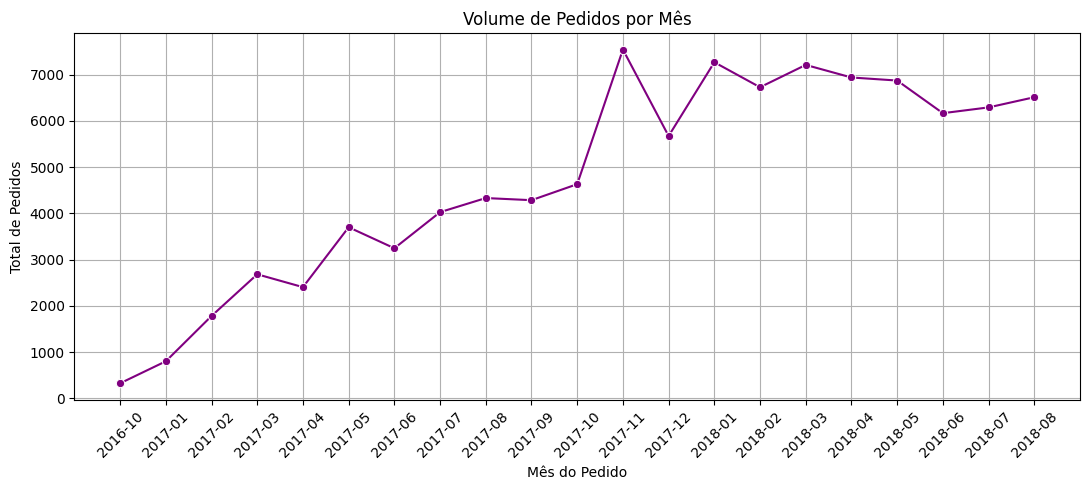

In [79]:
# Plotando o volume mensal
plt.figure(figsize=(11, 5))
sns.lineplot(data=volume_mensal_filtrado, x='order_month', y='total_orders', marker='o', color = 'purple')
plt.title('Volume de Pedidos por Mês')
plt.xlabel('Mês do Pedido')
plt.ylabel('Total de Pedidos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

1. Picos de vendas em:

- Novembro de 2017: Provável influência da Black Friday

- Janeiro de 2018: Alta pós-festas, possível efeito de trocas e promoções

2. Queda em:

- Fevereiro (mês curto)

- Junho e julho têm pequenas quedas, sugerindo sazonalidade moderada

Tendência geral de crescimento até metade de 2018.

b) Qual a distribuição do tempo de entrega dos pedidos?

In [85]:
# Conectando ao SQLite e salva a tabela
conn = sqlite3.connect("olist.db")
pedidos.to_sql("pedidos", conn, if_exists="replace", index=False)

99441

In [92]:
# Query SQL para calcular o tempo de entrega
# - Essa query calcula o tempo de entrega em dias com a função julianday() (SQLite), e filtra apenas as entregas que aconteceram (evita nulos e negativas).
query = '''SELECT
    order_id,
    order_purchase_timestamp,
    order_delivered_customer_date,
    julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp) AS delivery_time_days
FROM
    pedidos
WHERE
    order_delivered_customer_date IS NOT NULL
    AND order_purchase_timestamp IS NOT NULL
    AND julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp) > 0;
'''

tempo_entrega = pd.read_sql_query(query, conn)


In [94]:
query = '''SELECT
    ROUND(AVG(julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp)), 2) AS media_dias_entrega,
    ROUND(MIN(julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp)), 2) AS entrega_mais_rapida,
    ROUND(MAX(julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp)), 2) AS entrega_mais_demorada
FROM
    pedidos
WHERE
    order_delivered_customer_date IS NOT NULL
    AND order_purchase_timestamp IS NOT NULL
    AND julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp) > 0;
'''

tempo_medio = pd.read_sql_query(query, conn)

print(tempo_medio)

   media_dias_entrega  entrega_mais_rapida  entrega_mais_demorada
0               12.52                 0.53                 209.63


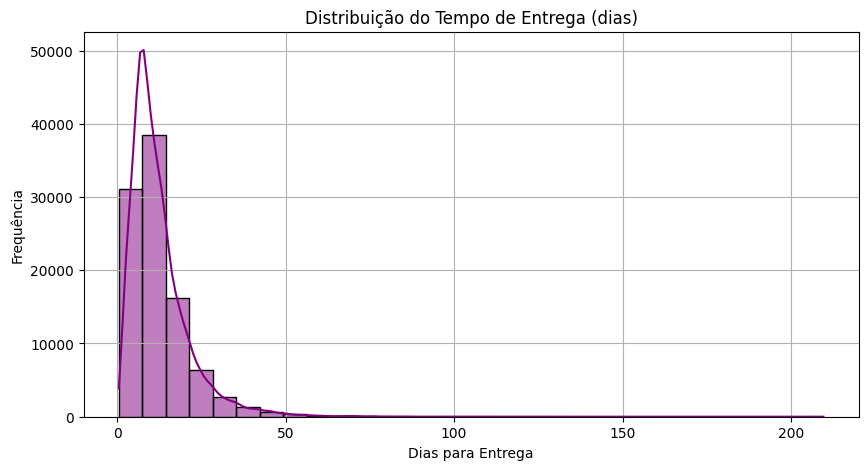

In [ ]:
# Visualizando com python
plt.figure(figsize=(10, 5))
sns.histplot(tempo_entrega['delivery_time_days'], bins=30, kde=True, color='purple')
plt.title('Distribuição do Tempo de Entrega (dias)')
plt.xlabel('Dias para Entrega')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

- Pico em torno de 7 a 15 dias: Condiz com a média de ~12,5 dias encontrada.
- Entrega mais rápida: 0,53 dias.
- Entrega mais demorada: 209,63 dias.
- Distribuição assimétrica à direita: Isso é esperado em dados de entrega — a maioria dos pedidos chega em poucos dias, mas há outliers com entregas muito demoradas.

c) Qual a relação entre o valor do frete e a distância de entrega?

1 Colunas necessárias:
- `freight_value` → valor do frete (está no dataset `order_items`)
- `distance` → distância entre o vendedor e o cliente (não tem)
2. Calculando a distância - requisitos necessários:
- Tabela `geolocalizacao` com latitude/longitude por CEP, tabela `pedidos` e tabela `itens_pedidos`
- Tabela `clientes` com `customer_zip_code`
- Tabela `vendedores` com `seller_zip_code`
- Aplicar a fórmula de Haversine para calcular a distância entre cliente e vendedor

Passo a passo:

I) Criando uma tabela com lat/long de clientes e vendedores

In [119]:
# Conectando ao SQLite e salva a tabela
conn = sqlite3.connect("olist.db")
geolocalizacao.to_sql("geolocalizacao", conn, if_exists="replace", index=False)
clientes.to_sql("clientes", conn, if_exists="replace", index=False)
vendedores.to_sql("vendedores", conn, if_exists="replace", index=False)
itens_pedidos.to_sql("itens_pedidos", conn, if_exists="replace", index=False)


112650

In [140]:
# Drop se já existir
conn.execute("DROP VIEW IF EXISTS geolocation_avg")

query = '''CREATE VIEW geolocation_avg AS
SELECT
    geolocation_zip_code_prefix AS zip_code_prefix,
    AVG(geolocation_lat) AS latitude,
    AVG(geolocation_lng) AS longitude
FROM geolocalizacao
GROUP BY zip_code_prefix;
'''

conn.execute(query)

II) Criando tabela com coordenadas dos clientes e vendedores por pedido

In [141]:
# Drop se já existir
conn.execute("DROP VIEW IF EXISTS order_coords")

query = '''CREATE VIEW order_coords AS
SELECT
    o.order_id,
    c.customer_id,
    s.seller_id,
    gc.latitude AS customer_lat,
    gc.longitude AS customer_lng,
    gs.latitude AS seller_lat,
    gs.longitude AS seller_lng
FROM pedidos o
JOIN clientes c ON o.customer_id = c.customer_id
JOIN itens_pedidos oi ON o.order_id = oi.order_id
JOIN vendedores s ON oi.seller_id = s.seller_id
LEFT JOIN geolocation_avg gc ON c.customer_zip_code_prefix = gc.zip_code_prefix
LEFT JOIN geolocation_avg gs ON s.seller_zip_code_prefix = gs.zip_code_prefix;
'''

conn.execute(query)

III) Criando função Python para calcular distância Haversine

In [142]:
# Função Haversine (retorna distância em km)
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calcula a distância haversine entre dois pares de coordenadas (vetorizado)
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 

    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c
    return km

IV) Puxando os dados com pandas + SQL e calculando a distância com a função Haversine

In [143]:
query = """
SELECT
    order_id,
    customer_lat,
    customer_lng,
    seller_lat,
    seller_lng,
    freight_value
FROM order_coords
JOIN itens_pedidos USING(order_id)
"""
dist = pd.read_sql_query(query, conn)

dist['distance_km'] = haversine_np(
    dist['customer_lng'], dist['customer_lat'],
    dist['seller_lng'], dist['seller_lat']
)

V) Analisando a relação entre frete e distância

In [144]:
dist[['freight_value', 'distance_km']].corr()

,freight_value,distance_km
freight_value,1.000000,0.376559
distance_km,0.376559,1.000000


- O valor 0.3766 indica uma correlação positiva moderada entre a distância e o frete.
- Isso significa que, em média, quanto maior a distância entre o cliente e o vendedor, maior tende a ser o valor do frete.
- Mas como a correlação não é forte, há outros fatores influenciando o valor do frete (peso, transportadora, tipo de entrega, etc.).

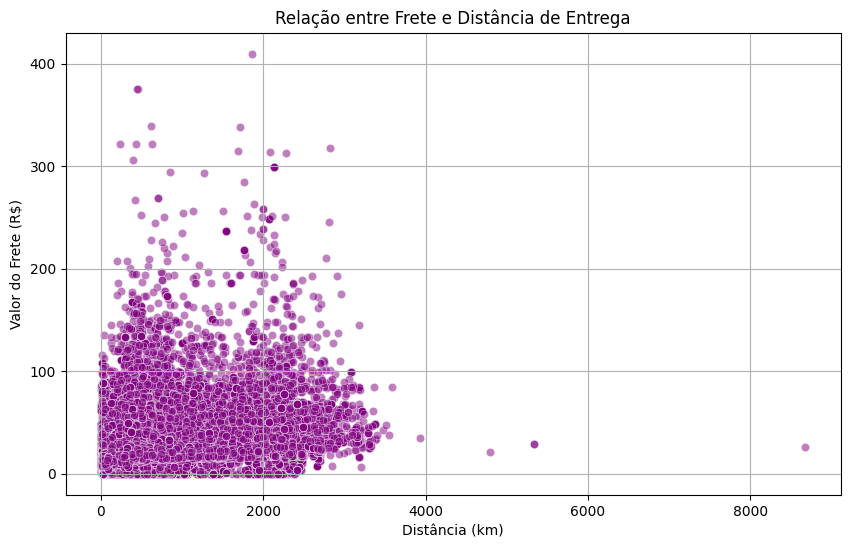

In [149]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_km', y='freight_value', data=dist, alpha=0.5, color = 'purple')
plt.title('Relação entre Frete e Distância de Entrega')
plt.xlabel('Distância (km)')
plt.ylabel('Valor do Frete (R$)')
plt.grid(True)
plt.show()

d) Quais são as categorias de produtos mais vendidos em termos de faturamento?

Passo a passo:
- Juntar as tabelas `itens_pedidos` e `produtos`, usando `product_id`.

- Calcular o faturamento total por categoria (`product_category_name`) usando a coluna `price` da `itens_pedidos`.

- Ordenar os resultados do maior para o menor

In [151]:
produtos.to_sql("produtos", conn, if_exists="replace", index=False)

query = '''SELECT 
    p.product_category_name,
    ROUND(SUM(oi.price), 2) AS total_faturamento
FROM itens_pedidos oi
JOIN produtos p ON oi.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY total_faturamento DESC
LIMIT 10;
'''
top_categorias_query = pd.read_sql_query(query, conn)

print(top_categorias_query)

    product_category_name  total_faturamento
0            beleza_saude         1258681.34
1      relogios_presentes         1205005.68
2         cama_mesa_banho         1036988.68
3           esporte_lazer          988048.97
4  informatica_acessorios          911954.32
5        moveis_decoracao          729762.49
6              cool_stuff          635290.85
7   utilidades_domesticas          632248.66
8              automotivo          592720.11
9      ferramentas_jardim          485256.46


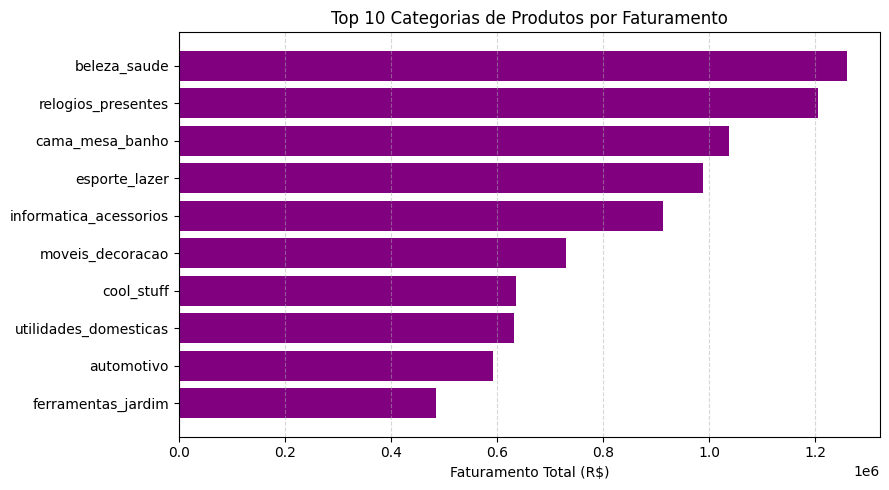

In [156]:
# Organizando os dados
top_categorias_query.sort_values("total_faturamento", ascending=True, inplace=True)

# Criando o gráfico
plt.figure(figsize=(9, 5))
plt.barh(top_categorias_query['product_category_name'], top_categorias_query['total_faturamento'], color='purple')
plt.xlabel('Faturamento Total (R$)')
plt.title('Top 10 Categorias de Produtos por Faturamento')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- Categorias com maior faturamento: `beleza_saude`, `relogios_presentes` e `cama_mesa_banho`.

e) Quais estados brasileiros possuem o maior valor médio de pedido?

- Calcular o valor médio dos pedidos (`freight_value` + `price`) por estado do cliente

In [157]:
query = '''SELECT 
    c.customer_state,
    ROUND(AVG(oi.price + oi.freight_value), 2) AS valor_medio_pedido
FROM pedidos p
JOIN clientes c ON p.customer_id = c.customer_id
JOIN itens_pedidos oi ON p.order_id = oi.order_id
GROUP BY c.customer_state
ORDER BY valor_medio_pedido DESC;
'''
maior_valor_medio = pd.read_sql_query(query, conn)

print(maior_valor_medio)

   customer_state  valor_medio_pedido
0              PB              234.20
1              AL              216.73
2              AC              213.80
3              RO              207.04
4              PA              201.53
5              PI              199.51
6              AP              198.33
7              TO              194.78
8              RR              193.55
9              RN              192.62
10             SE              189.69
11             CE              186.47
12             MA              183.46
13             PE              178.43
14             MT              176.46
15             AM              168.70
16             MS              166.00
17             BA              160.97
18             GO              149.04
19             DF              146.81
20             SC              146.12
21             RJ              146.08
22             ES              143.97
23             RS              142.07
24             MG              141.38
25          

- Estados com maior valor médio:
1. PB - R$ 234,20
2. AL - R$ 216,73
3. AC - R$ 213,80
4. RO - R$ 207,04
5. PA - R$ 201,53

- Enquanto SP (São Paulo), apesar de ser um dos maiores mercados, tem o menor valor médio: R$ 124,80.

C:\Users\bianc\AppData\Local\Temp\ipykernel_22272\2669736533.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='valor_medio_pedido', y='customer_state', data=maior_valor_medio, palette='viridis')


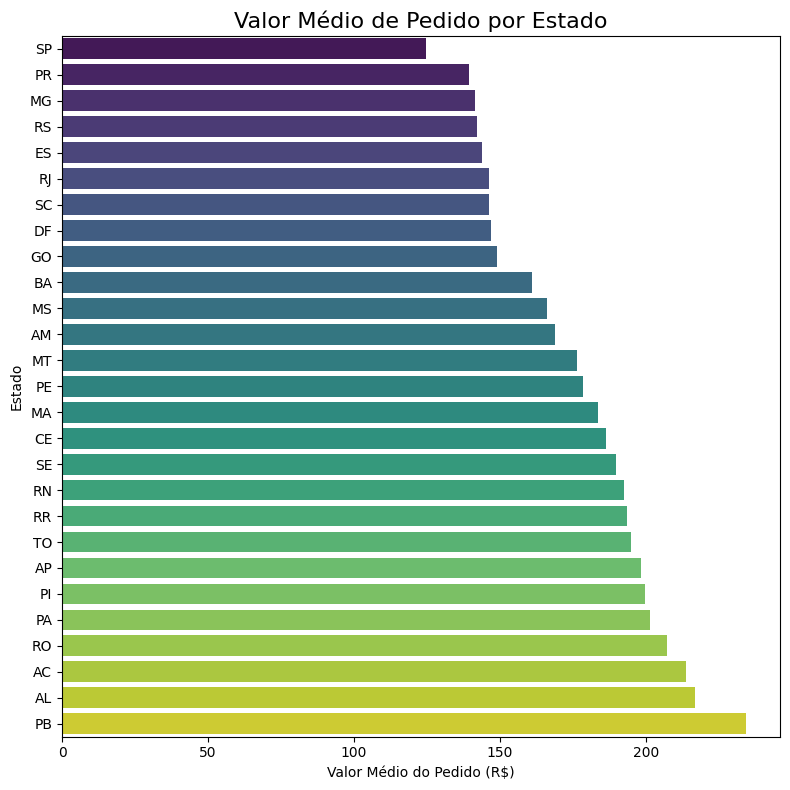

In [162]:
# Ordenando os dados do maior para o menor valor médio de pedido
maior_valor_medio = maior_valor_medio.sort_values(by='valor_medio_pedido', ascending=True)

# Criando o gráfico
plt.figure(figsize=(8, 8))
sns.barplot(x='valor_medio_pedido', y='customer_state', data=maior_valor_medio, palette='viridis')
plt.title('Valor Médio de Pedido por Estado', fontsize=16)
plt.xlabel('Valor Médio do Pedido (R$)')
plt.ylabel('Estado')

# Mostrando o gráfico
plt.tight_layout()
plt.show()

## 3. Solução de Problemas de Negócio